In [1]:
import numpy as np
import networkx as nx
import scipy

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
from collections import Counter

matplotlib.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-deep')

In [2]:
def build_uniform_graph(d, n):
    """    
    d --> degree number per node (always constant)
    n --> number of nodes
    """
    G = nx.random_regular_graph(d, n)
    return G


def plot_g(g):
    matplotlib.rcParams['figure.figsize'] = (3, 3)
    pos = nx.spring_layout(g)
    nx.draw_networkx(g, 
                    pos, 
                    with_labels = True, 
                    edgecolors = 'black',
                    node_size = 200) 


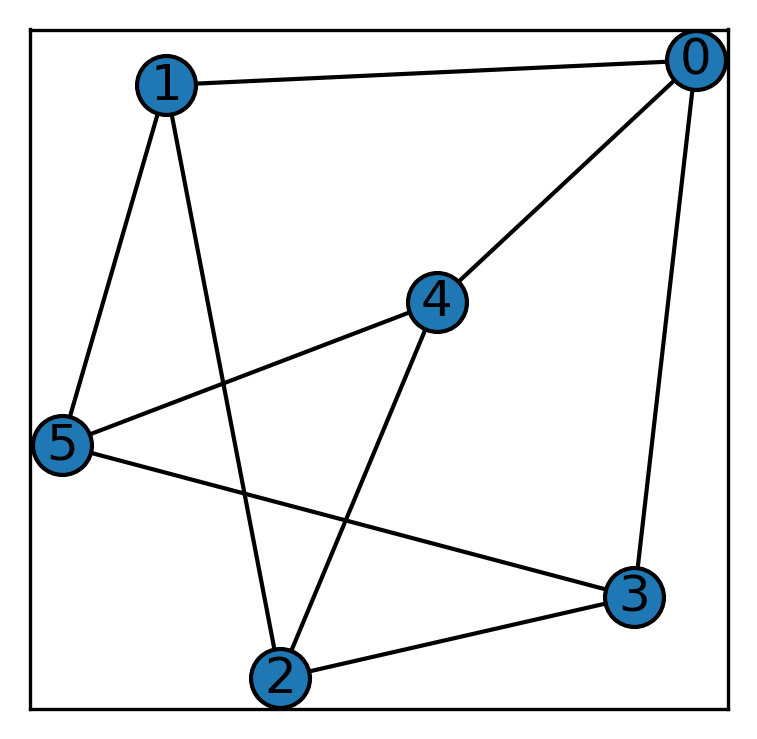

In [3]:

d = 3
n = 6
g = build_uniform_graph(d, n)
plot_g(g)

outpath = f"figures/random_d_g.png"
plt.savefig(outpath, bbox_inches = 'tight')

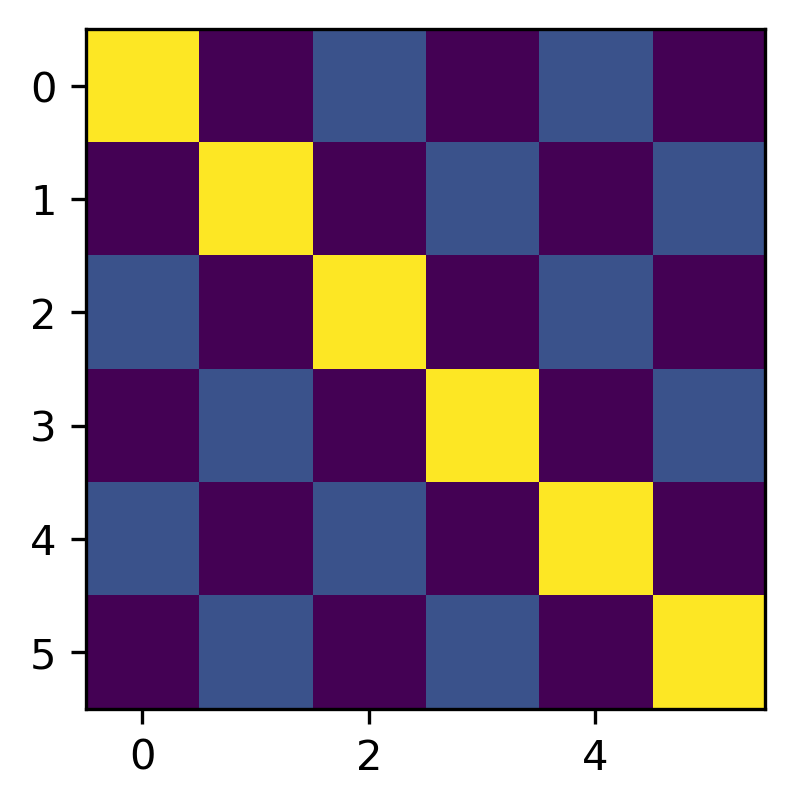

In [4]:
def compute_D(W):
    """A function to compute D, given W
    
    Args:
        - W (2d np.array): adjency matrix
        
    Returns:
        - D (2d dioagonal np.array)
    """
    D = np.zeros(W.shape)
    
    for i in range(0, len(W)):
        D[i,i] = np.sum(W[:,i])
        
    return D


def get_A_L_eigs(g):
    """compte eigenvalues of A and L"""

    A = nx.to_numpy_matrix(g)

    # three different versions of the laplacian
    # they all agree
    L = nx.laplacian_matrix(g).todense()
    # L = scipy.sparse.csgraph.laplacian(A, normed=True)
    # D = compute_D(A)
    # L = D - A

    a_eig, _ = np.linalg.eig(A)
    l_eig, _ = np.linalg.eig(L)

    res = {
        'A':A,
        'L':L,
        'a_eig': sorted(a_eig),
        'l_eig': sorted(l_eig[::-1]),
    }
    return res

res = get_A_L_eigs(g)

plt.imshow(res['L'])
# outpath = f"figures/L2.png"
# plt.savefig(outpath, bbox_inches = 'tight')

In [5]:
_l_prime = [d - x for x in res['a_eig']]
print(_l_prime)
print()
print(res['l_eig'][::-1])


[5.999999999999998, 3.0000000000000004, 3.0, 3.0, 3.0, 8.881784197001252e-16]

[6.000000000000001, 3.0000000000000004, 3.0, 2.9999999999999996, 2.9999999999999996, 0.0]


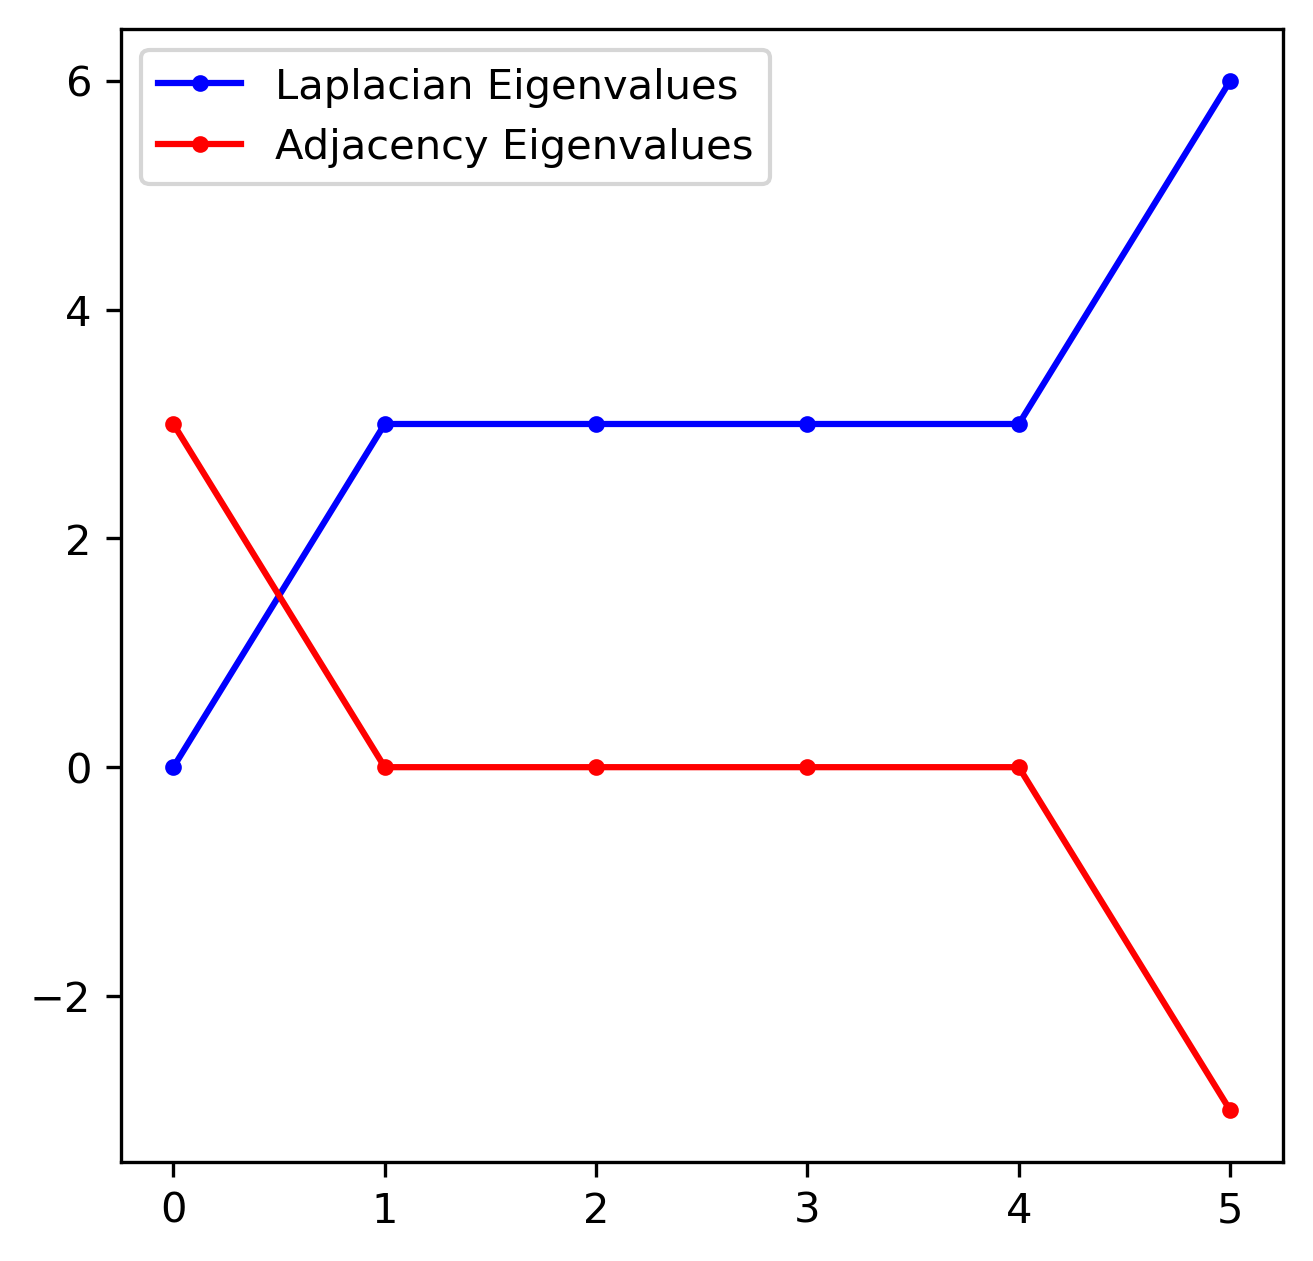

In [6]:
    matplotlib.rcParams['figure.figsize'] = (5, 5)
    idx = range(len(res['l_eig']))

    # plot singular values of L
    plt.plot(idx, res['l_eig'],
            color='blue',    
            marker='.',
            label='Laplacian Eigenvalues')

    # plot singular values of A
    plt.plot(idx, res['a_eig'][::-1], 
            color='red',    
            marker='.',
            label='Adjacency Eigenvalues')

    # # plot d - a_eig
    # _l_prime = [d - x for x in res['a_eig']]

    # plt.plot(idx, _l_prime, 
    #         color='C4',    
    #         marker='.',
    #         label='d-mui')


plt.legend()
outpath = f"figures/eigs.png"
plt.savefig(outpath, bbox_inches = 'tight')

In [7]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)


print(bmatrix(res['A']))

\begin{bmatrix}
  0. & 1. & 0. & 1. & 0. & 1.\\
  1. & 0. & 1. & 0. & 1. & 0.\\
  0. & 1. & 0. & 1. & 0. & 1.\\
  1. & 0. & 1. & 0. & 1. & 0.\\
  0. & 1. & 0. & 1. & 0. & 1.\\
  1. & 0. & 1. & 0. & 1. & 0.\\
\end{bmatrix}


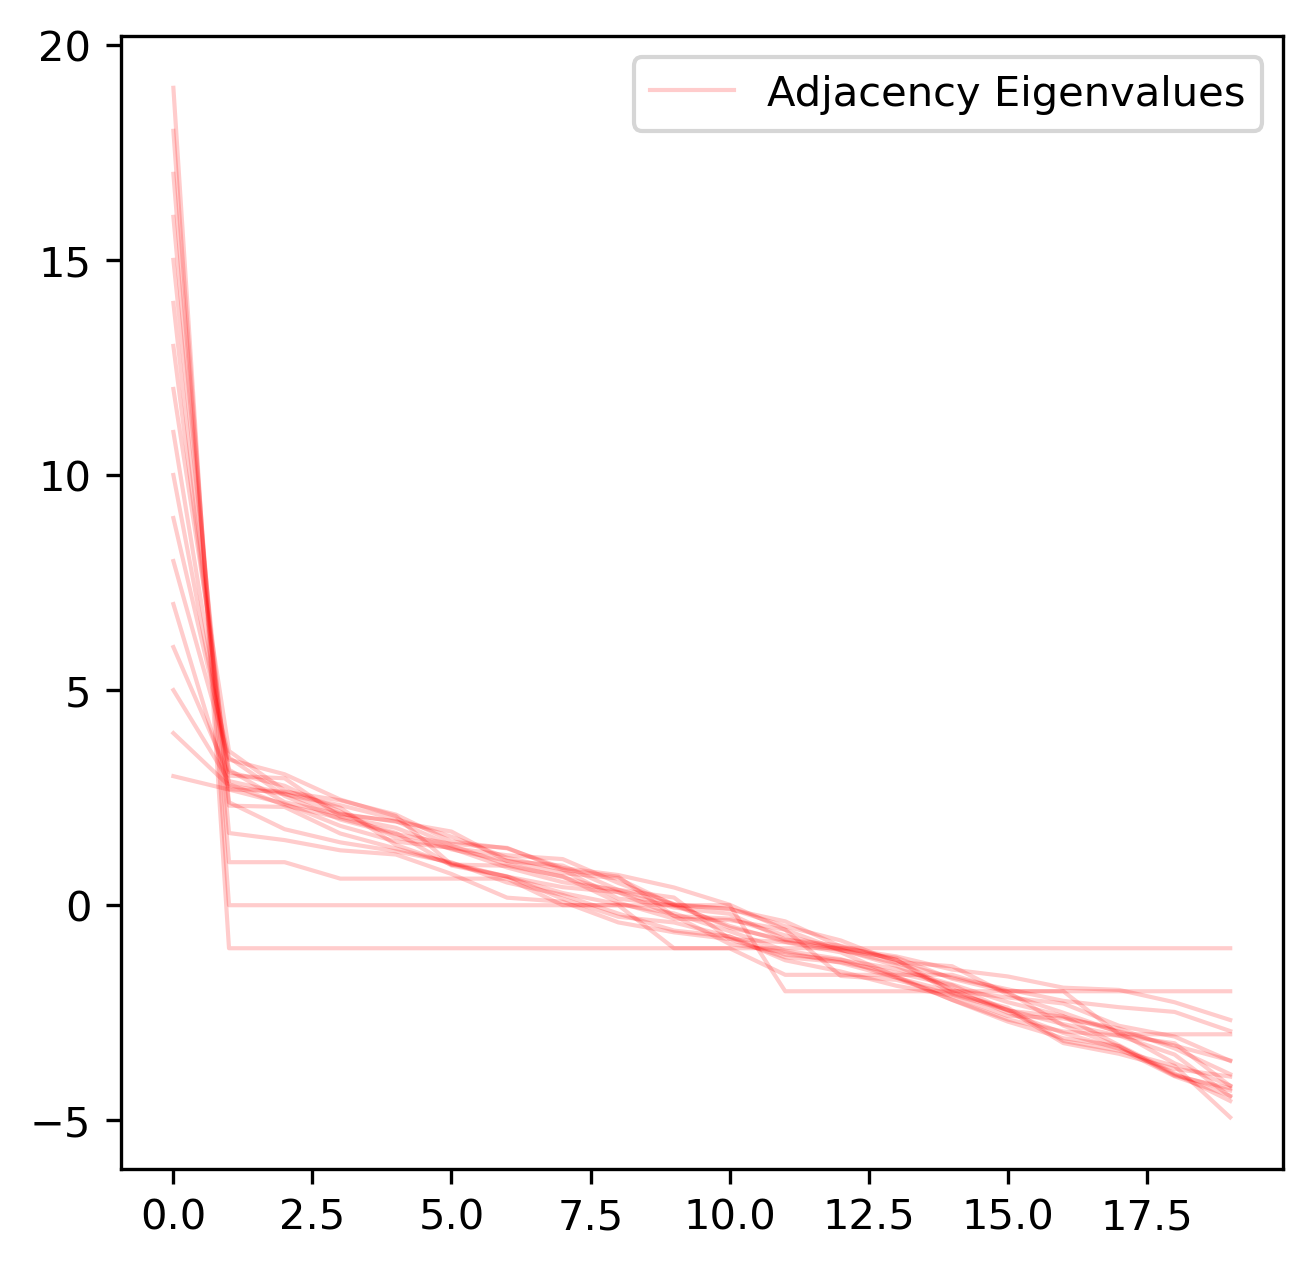

In [11]:

N = 20
ALPHA = 0.2
LW = 1

for i, d in enumerate(range(3, N)):
    g = build_uniform_graph(d, N)
    res = get_A_L_eigs(g)

    matplotlib.rcParams['figure.figsize'] = (5, 5)
    idx = range(len(res['l_eig']))

    if i == 0:
        # # plot singular values
        # plt.plot(idx, res['l_eig'],
        #         color='blue', 
        #         lw=LW,
        #         alpha=ALPHA,   
        #         label='Laplacian Eigenvalues')

        # plot singular values
        plt.plot(idx, res['a_eig'][::-1],
                color='red',
                lw=LW,
                alpha=ALPHA,    
                label='Adjacency Eigenvalues')

    else:
        # # plot singular values
        # plt.plot(idx, res['l_eig'],
        #         lw=LW,
        #         color='blue', 
        #         alpha=ALPHA)

        # plot singular values
        plt.plot(idx, res['a_eig'][::-1],
                lw=LW,
                color='red',
                alpha=ALPHA)

plt.legend()
outpath = f"figures/as_d.png"
plt.savefig(outpath, bbox_inches = 'tight')

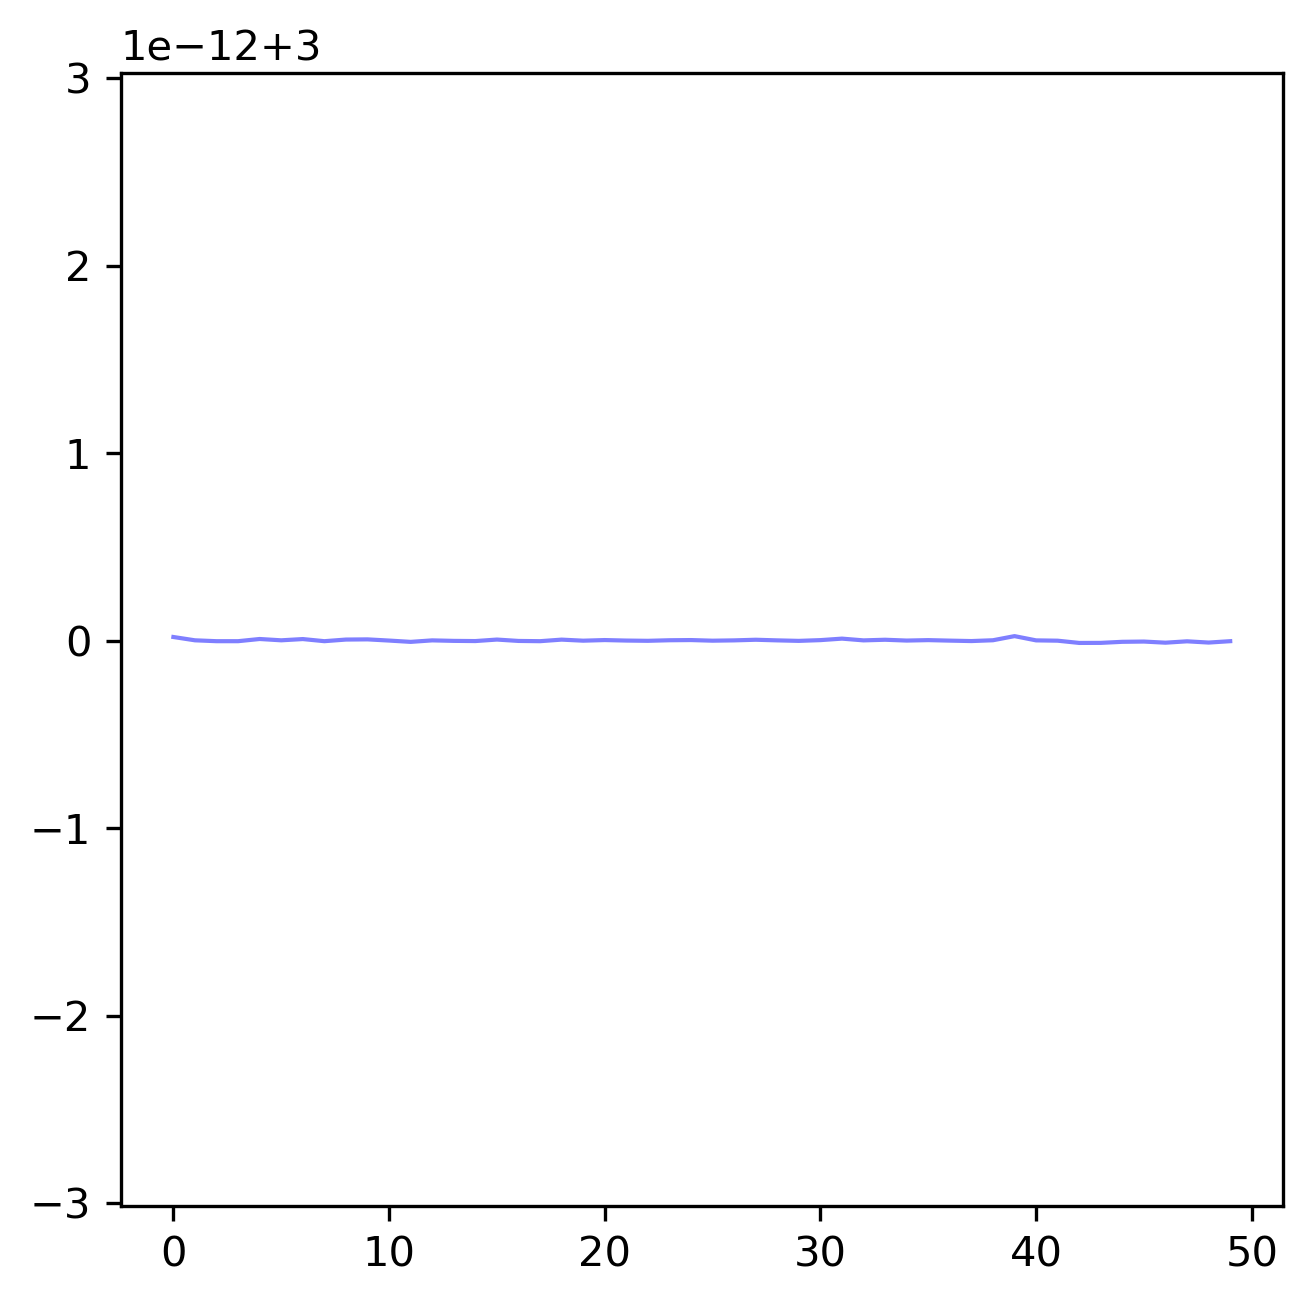

In [16]:
N = 50
D = 3
ALPHA = 0.5
LW = 1

g = build_uniform_graph(D, N)
res = get_A_L_eigs(g)

matplotlib.rcParams['figure.figsize'] = (5, 5)
idx = range(len(res['l_eig']))

tmp = np.add(res['l_eig'], res['a_eig'][::-1])

plt.plot(idx, tmp,
        color='blue', 
        lw=LW,
        alpha=ALPHA,   
        label='Laplacian Eigenvalues')

# # plot singular values
# plt.plot(idx, res['a_eig'][::-1],
#         color='red',
#         lw=LW,
#         alpha=ALPHA,    
#         label='Adjacency Eigenvalues')


# plt.legend()
# outpath = f"figures/eigs.png"
# plt.savefig(outpath, bbox_inches = 'tight')